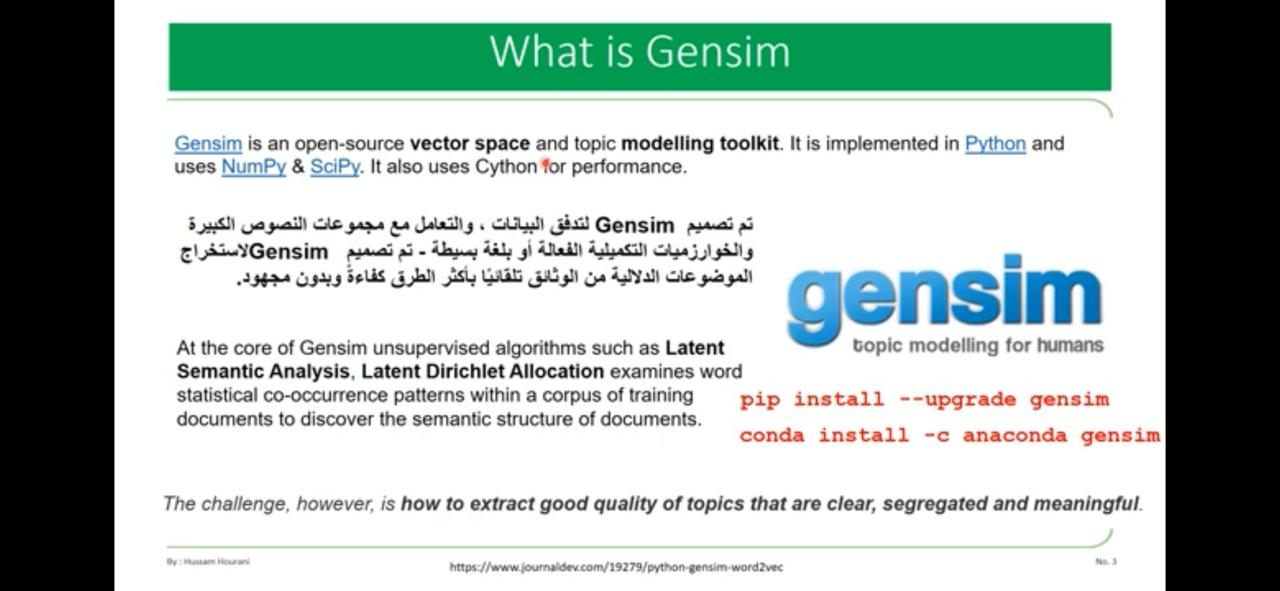

In [ ]:
!pip install --upgrade gensim 

In [ ]:
!conda install -c anaconda gensim 

# Create a Dictionary from a list of sentences

In [ ]:
from gensim import corpora
documents = ['The city of Petra, capital of the Nabataean Arabs',
"is one of the most famous archaeological sites in the world",
"it is Located 240 km south of the capital Amman",
"capitalize and 120 km north of the red sea town of Agaba"]
# Tokenize the sentences into words
texts = [[text for text in doc.split()] for doc in documents]
print (texts)
dictionary = corpora.Dictionary(texts)
print ("\n", dictionary)
print("\n", dictionary.tokenzid)

In [ ]:
from gensim import corpora
text = ["""In computer science, artificial intelligence (AI),
sometimes called machine intelligence, is intelligence
demonstrated by machines, in contrast to the natural intelligence
displayed by humans and animals. Computer science defines
AI research as the study of intelligent agents: any device that perceives its environment and takes actions that maximize its
chance of successfully achieving its goals."""]
tokens = [[token for token in sentence.split()] for sentence in text]
gensim_dictionary = corpora. Dictionary(tokens)
print("The dictionary has: " +str (len (gensim_dictionary)) + " tokens")
for k, v in gensim_dictionary.tokenid.items () :
    print(f'{k: {15}} {v:{10}}')

# Create a Dictionary from a text file


Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.

In [ ]:
from gensim.utils import simple_preprocess
from gensim import corpora
# Create gensim dictionary form a single txt file
dictionary = corpora.Dictionary (simple_preprocess(line, deacc=True)
                                 for line in open('petra.txt', encoding= 'utf-8'))
print(dictionary.token2id)

# Create a bag of words
a Bag of Words is the word id and its frequency in each document.


In [ ]:
from gensim.utils import simple_ preprocess
from gensim import corpora
my_docs = ["Petra is in Jordan","Amman? Amman? Amman?"]
# Tokenize the docs
tokenized_list = [simple_preprocess (doc) for doc in my_docs]
mydict = corpora.Dictionary ()
mycorpus = [mydict. doc2bow (doc, allow_update=True) for doc in tokenized_list]
print (mycorpus)
print("\n")
word_counts = [[(mydict[id], count) for id, count in line] for line in mycorpus]
print(word_counts)

# Create a bag of words from Txt File

In [ ]:
from gensim.utils import simple_preprocess
from gensim import corpora
tokens = [simple_preprocess (sentence, deacc=True) for sentence in open (r'dataset.csv', encoding= 'utf-8')]
gensim_dictionary = corpora.Dictionary()
gensim_corpus = [gensim_ dictionary.doc2bow(token, allow_update=True) for token in tokens]
word_frequencies = [[(gensim_dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]
print(word frequencies)


# Save and load a dictionary to/from disk

In [ ]:
from gensim.utils import simple_ preprocess
from gensim import corpora
my_docs = ["Petra is in Jordan","Amman? Amman? Amman?"]
# Tokenize the docs
tokenized_list = [simple_preprocess (doc) for doc in my_docs]
mydict = corpora.Dictionary ()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
print(mycorpus)
print("\n")
# Save the Dict and Corpus
mydict.save('mydict.dict')
# save dict to disk
corpora.MmCorpus.serialize ('bow_corpus.mm', mycorpus) # save corpus to disk
# Load them back
loaded_dict = corpora. Dictionary. load('mydict.dict')
print (loaded_dict)
corpus = corpora.MmCorpus ('bow_corpus.mm")
for line in corpus:
    print(line)

# Create the TFIDF matrix (corpus) in gensim
TF-IDF: Term Frequency - Inverse Document Frequency                         
SMART: System for the Mechanical Analysis and Retrieval of Text

In [ ]:
from gensim import models
from gensim import corpora
from gensim.utils import simple_preprocess
import numpy as np
documents = ["This is the first line","This is the second sentence","This third document"]
mydict = corpora. Dictionary([simple_preprocess(line) for line in documents])
corpus = [mydict.doc2bow(simple_preprocess(line)) for line in documents]
# Show the Word Weights in Corpus
for doc in corpus:
    print([[mydict[id], freq] for id, freq in doc])
print ("\n")
# Create the TF-IDF model
tfidf = models. TfidfModel (corpus, smartirs='ntc')
# Show the TF-IDF weights
for doc in tfidf[corpus]:
    print([[mydict[id], np.around(freq, decimals=2)] for id, freq in doc])

# Unigram, Bigram and Trigram ... Gensim

In [ ]:
import gensim
from gensim import corpora
import gensim. downloader as api
dataset = api.load("text8")
dataset = [wd for wd in dataset]
dct = corpora. Dictionary (dataset)
corpus = [dct.doc2bow(line) for line in dataset]
# Build the bigram models
bigram = gensim. models.phrases.Phrases (dataset, min_count=3, threshold=10)
# Construct bigram
print(bigram[dataset [0]])
# Build the trigram models
trigram = gensim.models.phrases.Phrases (bigram[dataset], threshold=10)
# Construct trigram
print(trigram[bigram[dataset [0]]])

# Unigram, Bigram and Trigram ... NLTK

In [ ]:
from nitk import ngrams
Sentences="I am a good boy . Rahul Ghandhi will be next \
Prime Minister. APJ Abdul Kalam was an Indian scientist "
bigram=list(ngrams (Sentences. lower().split(),2))
trigram=list(ngrams (Sentences. lower ().split(),3))
fourgram=list (ngrams (Sentences.lower ().split(),4))
print ("\n", bigram)
print ("\n", ‚trigram)
print ("\n", fourgram)

# DOC2VEC: to find most similar doc using tags

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nitk. tokenize import word_tokenize
data = ["I love machine learning. Its awesome.","I love coding in python","I love building chatbots","hey chat amagingäy well"]
tagged_data = [TaggedDocument (words=word_tokenize(_d.lower ()),
tags=[str(i)]) for i, _d in enumerate (data)]
print(tagged_data)
max_epochs = 100
vec_size = 20
alpha = 0.025
model = Doc2Vec(size=vec_size, alpha=alpha, min_alpha=0.00025,min_count=1, dm =1)
model. build_vocab (tagged_data)
for epoch in range (max_epochs):
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.iter)
    # decrease the learning rate
    model.alpha - = 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model. alpha
model. save ("d2v.model")
print("Model is Saved")

Output:

[TaggedDocument(words=['i', 'love', 'machine', 'learning', 'its', 'awesome', ' '], tags=['0']),         
TaggedDocument(words=['i', 'love', 'coding', 'in', 'python'], tags=['1']),           
 TaggedDocument(words=['i', 'love', 'building', 'chatbots'], tags=['2']),               
 TaggedDocument(words=['they', 'chat', 'amagingly', 'well'], tags=['3'])]

# DOC2VEC: to find most similar doc using tags

In [ ]:
from gensim.models.doc2vec import Doc2Vec
from nitk.tokenize import word_tokenize
data = ["I love machine learning. Its awesome","I love coding in python","I love building chatbots","they chat amagingly well"]

model= Doc2Vec. load("d2v.model")
#to find the vector of a document which is not in training data
test_ data = word tokenize("I love chatbots".lower ())
v1 = model.infer vector(test data)
print("V1_infer:", V1)
# to find most similar doc using tags
similar doc = model.docvecs.most similar('1')
print("\nsimilar_doc :"‚similar_doc)
# to find vector of doc in training data using tags or in other words, 16 
#printing the vector of document at index 1 in training data
print("\nmodel.docvecs [1] :", model.docvecs ['1'])

# Word2Vec

In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this','is','the', 'first', 'sentence', 'for', 'word2vec'],['this','is','the','second','sentence'],['yet','another', 'sentence'],['one','more','sentence'],['and','the','final','sentence']]
# train model
model = Word2Vec (sentences, min_count=1)
# summarize the loaded model
print("Model:", model)
# summarize vocabulary
words = list(model.wv.vocab)
print("\nwords", words)
# access vector for one word
print ("\nmodel['sentence'] :", model ['sentence' ])
# save model
model.save ('model.bin')
# Load model
new_model = Word2Vec. load('model.bin')
print ("\nloaded model:", new_model)

output:
    
Model: Word2Vec (vocab=14, size=100, alpha=0.025)

words ['this','is'
'the',
'another',
'one',
'more',
'first',
'sentence',
'for', 'word',
'and',
'final'] 'word2vec', 'second', 'yet'

# Visualize Word Embedding

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this','is','the', 'first', 'sentence', 'for', 'word2vec'],['this','is','the','second','sentence'],['yet','another', 'sentence'],['one','more','sentence'],['and','the','final','sentence']]
# train model
model = Word2Vec (sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model [model.wv.vocab]
pca = PCA(n_ components=2)
result = pca.fit_transform(X)
# create a scatter plot of the proiection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot. annotate (word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Functions to preprocess raw text

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
print ( remove_stopwords ("Better late than never, but better never late."))

Better late never, better late.

In [ ]:
from gensim.parsing.preprocessing import split_alphanun
print( split alphanum("24.0hours7 days365 alb2c3"))

24.0 hours 7 days 365 a 1 b 2 c 3

In [ ]:
from gensim.parsing.preprocessing import stem_text
print ( stem_text("While it is quite useful to be able to \
search a large collection of documents almost instantly."))

while it is quit us to be abl to search a larg collect of document almost instantly.

In [ ]:
from gensim.parsing.preprocessing import strip_multiple_whitespaces
print (strip_multiple_whitespaces ("Hello " +'\r' +" My"+ "\n" +"          Name is"))

Hello My Name is Hussam!

In [ ]:
from gensim.parsing.preprocessing import strip_non_alphanum
print (strip_non_alphanum("if-you#can®read$this&then@this#method^works"))

if you can read this then this method works

In [ ]:
from gensim.parsing.preprocessing import strip_numeric
print (strip numeric("Otext24gensim365test"))

textgensimtest

In [ ]:
from gensim.parsing.preprocessing import strip_punctuation
print ( strip_punctuation ("A semicolon; is a stronger break than a comma,!")

A semicolon is a stronger break than a comma

In [ ]:
from gensim.parsing.preprocessing import strip_short
print (strip_short("salut a les amis du 59" ,minsize=3))

salut les amis

In [ ]:
from gensim.parsing.preprocessing import strip_tags
print (strip_tags ("<i›Hello‹/i> <b›World</b>!"))

Hello World!

# Functions to preprocess raw text 
preprocess string (in default NLP meaning) :

In [ ]:
from gensim.parsing.preprocessing import preprocess_string
print (preprocess_string("<i›Hi 910</i> <b›Hussam, rid</b>! Th3 weather_is really g00d today, isn't it?"))

 ['hussam', 'rld', 'weather','todai', 'isn']

In [ ]:
from gensim.parsing.preprocessing import preprocess_documents
print (preprocess_documents (["<i›Hel 91o‹/i› ‹b›Wo9 rid</b›!","Th3 weather_is really gOOd today, isn't it?"]))

[['hel' , 'rld'], ['weather', 'todai', 'isn']]

In [ ]:
# Unicode lowercased and porter-stemmed version of string text.
from gensim.parsing.preprocessing import stem_text
print (stem_text ("WHILE it is quite good to be able to earch documents almost instantly."))

while it is quit good to be abl to search document almost instantly.

# Topic Modeling

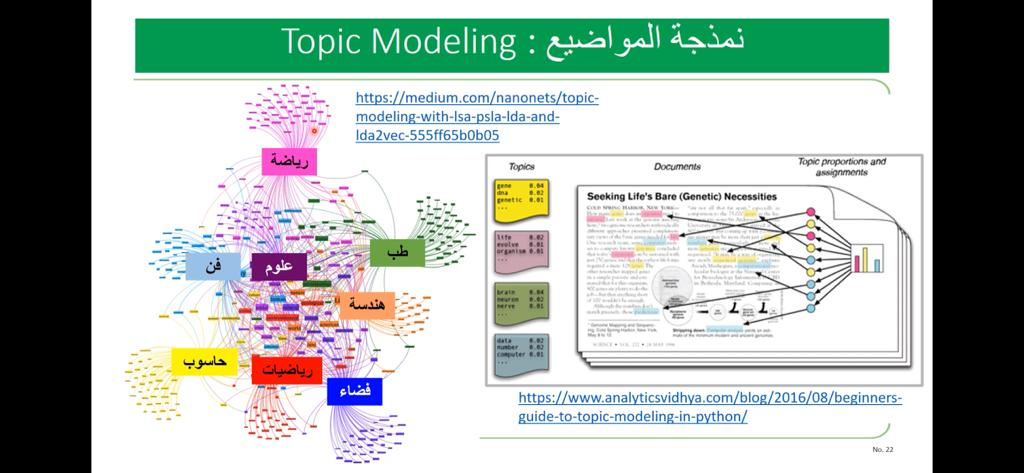

# Topic Modeling LDA

In [ ]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove stopwords
my_docs = ["Human machine interface for lab abc computer applications",
           "A survey of user opinion of computer system response time","The EPS user interface management system",
           "System and human system engineering testing of EPS","Relation of user perceived response time to error measurement"
           ,"Graph minors IV Widths of trees and well quasi ordering","Graph minors A survey",
           "Sugar is bad to consume. My sister likes to have sugar, but not my father"
           ,"My father spends a lot of time driving my sister around to dance practice.","Doctors suggest that driving may cause increased stress and blood pressure.","Sometimes I feel pressure to perform well at school"
           ,"Health experts say that Sugar is not good for your lifestyle."]

In [ ]:
my_docs= [remove_stopwords (doc) for doc in my_docs]
# Tokenize the docs
tokenized_list = [simple_preprocess (doc) for doc in my_docs]
# convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long
texts = [[text for text in doc.split()] for doc in my_docs]
mydict = corpora. Dictionary(texts)
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
# Creating the object for LDA model
Lda = gensim.models.ldamodel.LdaModel
# Running and Trainign LDA model on the document.
ldamodel = Lda (mycorpus, num_topics=3, id2word = mydict, passes=50)
print("LDA model is: \n", Idamodel.print_topics (num_topics=3, num_words=3))

Output:                       
ILDA model is:
[10,
'0.059*"human" + 0.034*"interface" +
0.034*"eps"'), (1, '0.059*"time" + 0.059*"user" +
0.041*"response""), (2, , '0.062*" sugar" +
0.025*"pressure" + 0.025*"graph"')]

In [ ]:
print("LDA model is: \n", Idamodel.print_topics(num_tgpics=3, num_words=2))

Output:                            
ILDA model is:
[(0, '0.035*"response" + 0.035*"interface"'), (1, l'0.039*"minors" + 0.039*"graph"'), (2, '0.065*"sugar" + 0.026*"pressure"")]

In [ ]:
print ("LDA model is: \n", Idamodel.print_topics (num_topics=3, num_words=1))


Output:                        
LDA model is:
[(0,'0.039*"sugar""), (1, '0.058*"graph"'), (2,'0.069*"user"')]

# Topic Modeling Visualization

In [ ]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
my_docs = ["Human machine interface for lab abc computer applications",
"A survey of user opinion of computer system response time",
"The EPS user interface management system",
"System and human system engineering testing of EPS",
"Relation of user perceived response time to error measurement",
"Graph minors IV Widths of trees and well quasi ordering",
"Graph minors A survey",
"Sugar is bad to consume. My sister likes to have sugar, but not my father.",
"My father spends a lot of time driving my sister around to dance practice.",
"Doctors suggest that driving may cause increased stress and blood pressure",
"Sometimes I feel pressure to perform well at school",
"'Health experts say that sugar is not good for your lifestyle. "]

my_docs= [remove_stopwords (doc) for doc in my_docs]
# Tokenize the docs
tokenized list = [simple preprocess(doc) for doc in my_docs]
texts = [[text for text in doc.split()] for doc in my_docs]
mydict = corpora.Dictionary (texts)
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
# Creating the obiect for LDA model
Lda = gensim.models.ldamodel.LdaModel
# Running and Trainign LDA model on the document.
ldamodel = Lda (mycorpus, num_topics=3, id2word = mydict, passes=50)
print("LDA model is: In", Idamodel.print_topics (num_topics=3, num_words=3))

import pyLDAvis.gensim     #  !pip install pyLDAvis
lda_visualization = pyLDAvis.gensim.prepare(Idamodel, mycorpus, mydict, sort_topics=False)
pyLDAvis.display (lda_visualization)

output:                      
LDA model is:
[(0, '0.034*" graph" + 0.034*"minors" + 0.033*"pressure"'),
(1,'0.065*"sugar" + 0.046*"eps" + 0.026*"human"'), (2, '0.058*"time" +0.041*"user" + 0.041*"response"")]

In [ ]:
import gensim
from gensim import corpora 
from gensim.utils import simple_preprocess 
from gensim.parsing-preprocessing import remove_stopwords
my_docs = ["Human machine interface for lab abc computer applications",
           "survey of user opinion of computer system response time",
            "The EPS user interface management system",
            "System and human system engineering testing of EPS",
            "Relation of user perceived response time to error measurement",
            "Graph minors I Widths of trees and well quasi ordering",
            "Graph minors A survey",
            "Sugar is bad to consume. My sister likes to have sugar, but not my father.",
            "My father spends a lot of time driving my sister around to dance practice.",
            "Doctors suggest that driving may cause increased stress and blood pressure.",
            "Sometimes I feel pressure to perform well at school",
            "Health experts say that Sugar is not good for your lifestyle."]
my_docs= [remove_stopwords(doc) for doc in my_docs]
# TOkenize the docs
tokenized_list = [simple_preprocess(doc) for doc in my_docs]
texts = [[text for text in doc.split()] for doc in my_docs]
mydict = corpora.Dictionary(texts)
mycorpus = [mydict.doc2bow(doc ,allow_update=True) for doc in tokenized_list]
# Creating the obiect for LDA model
Lda = gensim.models.Idamodel.LdaModel
# Running and Trainign LDA model on the document
Idamodel = Lda (mycorpus,
topics=3, ld2word = mydict, passes=50)
print("LDA model is: \n", ldamodel.print_topics(num_topics=3, num_words=3))
import pyLDAvis.gensim
Ada_visualization = pyLDAvis.gensim.prepare(ldamodel, mycorpus, mydict, sort_topics=False)
pyLDAvis.display (lda_visualization)

# Topic Modeling LSI-Example

In [ ]:
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from gensim.models import LsiModel
my_docs = ["Human machine interface for lab abc computer applications",
           "A survey of user opinion of computer system response time",
            "The EPS user interface management system",
            "System and human system engineering testing of EPS",
            "Relation of user perceived response time to error measurement",
            "Graph minors IV Widths of trees and well quasi ordering",
            "Graph minors A survey",
            "Sugar is bad to consume. My sister likes to have sugar, but not my father.",
            "My father spends a lot of time driving my sister around to dance practice.",
            "Doctors suggest that driving may cause increased stress and blood pressure.",
            "Sometimes I feel pressure to perform well at school",
            "Health experts say that Sugar is not good for your lifestyle."]

my_docs= [remove_stopwords (doc) for doc in my_docs]
# Tokenize the docs
tokenized_list = [simple_preprocess(doc) for doc in my_docs]
texts = [[text for text in doc.split()] for doc in my_docs]
mydict = corpora.Dictionary (texts)
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
lsi_model = LsiModel(mycorpus, num_topics=3, id2word=mydict)
topics = lsi_model.print_topics(num_words=3)
for topic in topics:
    print(topic)


output:                    
(0,'-0.440*"sugar" + -0.368*"sister" + -0.368*"my"')                  
(1,'0.463*"user" + 0.413*"time" + 0.375*"response"")                   
(2, '0.385*"pressure" + 0.371*"driving" + 0.300*"suggest"')

# Gensim functions

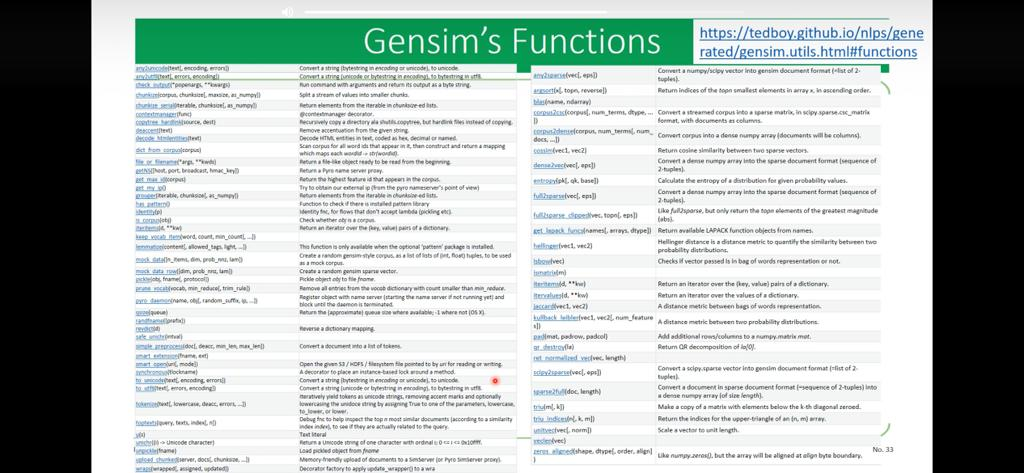

# Refernces:

https://www.machinelearningplus.com/nlp/gensim-tutorial/

https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

https://radimrehurek.com/gensim/parsing/preprocessing.html

https://medium.com/nanonets/topic-modeling-with-Isa-psla-Ida-and-Ida2vec-555ff65b0b05

https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

https://tedboy.github.io/nlps/generated/gensim.utils.htm|#functions